### Base Learner 7b  - Load Fit10 Model

In [17]:
from fastai2.vision.all import *
import sys, torch
sys.path.append('..')

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# %load_ext autoreload
# %autoreload 2

from modules.expbuilder import default_params, run_exp, rm_test_recorder

train_path = Path('../../../rf-chess-data/cropped_v1/')
train_clean_path = Path('../../../rf-chess-data/cropped_v1.1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

In [18]:
learn = load_learner('../models/base-learner7-fit10.pkl')

In [19]:
learn.path

Path('../models')

In [20]:
learn.path = Path('../../../rf-chess-data/cropped_v1.1')

In [21]:
my_params = {'_train_seed':0, '_custom_crop': 'my-top-crop', 
             '_model_arch': resnet50,
            '_train_path':train_clean_path,
            '_learn_norm': False,
            }
default_params.update(my_params)

set_seed(42)
train_dl, learn_fresh = run_exp(default_params, 'dummy', b_ret=True,)

In [22]:
learn.cbs

(#4) [TrainEvalCallback,Recorder,ProgressCallback,TestSetRecorder]

In [23]:
learn.cbs.pop(3)

TestSetRecorder

In [11]:
learn.cbs

(#3) [TrainEvalCallback,Recorder,ProgressCallback]

In [35]:
learn.dls = learn_fresh.dls

In [ ]:
learn.

### Assess Loaded Model

In [16]:
len(easy_test_dl.items)

162

              precision    recall  f1-score   support

black-bishop       0.85      0.79      0.81        14
  black-king       0.83      0.91      0.87        11
black-knight       0.80      1.00      0.89        12
  black-pawn       0.84      1.00      0.91        16
 black-queen       1.00      0.31      0.47        13
  black-rook       0.71      1.00      0.83        12
white-bishop       0.59      0.83      0.69        12
  white-king       0.73      0.79      0.76        14
white-knight       0.88      0.93      0.90        15
  white-pawn       0.88      0.93      0.90        15
 white-queen       1.00      0.21      0.35        14
  white-rook       0.80      0.86      0.83        14

    accuracy                           0.80       162
   macro avg       0.82      0.80      0.77       162
weighted avg       0.83      0.80      0.77       162



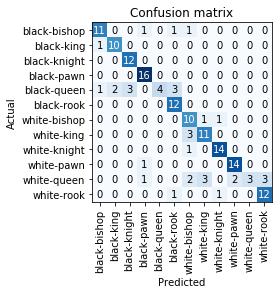

In [13]:
easy_test_dl = learn.dls.test_dl(get_image_files(test_path_easy), 
                                 with_labels=True)

interp = ClassificationInterpretation.from_learner(learn, 
                                                  dl = easy_test_dl)

interp.print_classification_report()

interp.plot_confusion_matrix()

### Continuing Fitting

In [25]:
from modules.learnutils import TestSetRecorder

In [26]:
learn.add_cb(TestSetRecorder())

In [27]:
learn.cbs

(#4) [TrainEvalCallback,Recorder,ProgressCallback,TestSetRecorder]

In [36]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc,time
0,0.184590,0.002244,1.000000,1.000000,1.000000,00:10
1,0.182403,0.004951,0.998258,0.998258,0.998258,00:10
2,0.180365,0.008345,0.998258,0.998258,0.998258,00:10
3,0.143784,0.005517,0.998258,0.998258,0.998258,00:10
4,0.113257,0.006877,0.998258,0.998258,0.998258,00:10


In [38]:
pd.DataFrame(learn.cbs[3].values)

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,0.856560,0.771930,0.973684,0.811404
6,0.807181,0.745614,0.956140,0.793860
7,0.836407,0.741228,0.951754,0.793860
8,0.714467,0.793860,0.973684,0.824561
9,0.768352,0.763158,0.951754,0.820175
